### Use kNN to replace missing values

In [1]:
import matplotlib.pyplot as plt  
import numpy as np 
import pandas as pd 
import seaborn as sns 

Generate artificial data

In [2]:
data = pd.DataFrame({'x': np.linspace(-6, 6), 'y': np.asarray([x1 * np.sin(x1) for x1 in np.linspace(-6, 6)])})

In [3]:
data.head()

,x,y
0,-6.000000,-1.676493
1,-5.755102,-2.899873
2,-5.510204,-3.847623
3,-5.265306,-4.480755
4,-5.020408,-4.784128


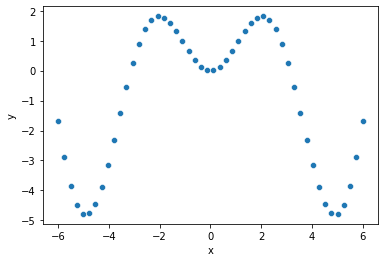

In [4]:
sns.scatterplot(data=data, x='x', y='y');

Let's delete some points at random

In [5]:
missing_fraction = 0.2
indices = np.random.randint(1, len(data.x) - 1, size=int((missing_fraction) * len(data.x)))

In [6]:
indices

array([18, 42, 40, 47,  9, 23, 21, 23, 19, 34])

In [7]:
data.iloc[-indices, 1] = np.nan

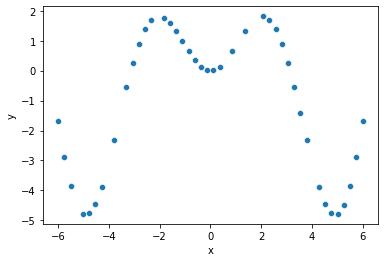

In [9]:
sns.scatterplot(data=data, x='x', y='y');

Let's use a simple method:
- Median

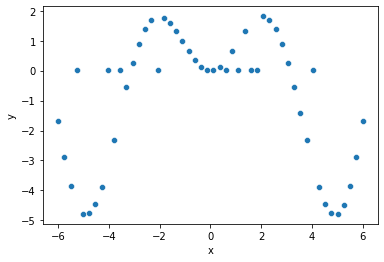

In [10]:
sns.scatterplot(data=data.fillna(data.median()), x='x', y='y');

In [11]:
data.y.median()

0.014956311913408763

In [12]:
data.x.median()

-4.440892098500626e-16

Use the KNN Imputer

In [13]:
from sklearn.impute import KNNImputer

### Exercise: use the KNNImputer to implace the data points and visualize the output

In [14]:
?KNNImputer

Init signature:
KNNImputer(
    *,
    missing_values=nan,
    n_neighbors=5,
    weights='uniform',
    metric='nan_euclidean',
    copy=True,
    add_indicator=False,
)
Docstring:     
Imputation for completing missing values using k-Nearest Neighbors.

Each sample's missing values are imputed using the mean value from
`n_neighbors` nearest neighbors found in the training set. Two samples are
close if the features that neither is missing are close.

Read more in the :ref:`User Guide <knnimpute>`.

.. versionadded:: 0.22

Parameters
----------
missing_values : int, float, str, np.nan or None, default=np.nan
    The placeholder for the missing values. All occurrences of
    `missing_values` will be imputed. For pandas' dataframes with
    nullable integer dtypes with missing values, `missing_values`
    should be set to np.nan, since `pd.NA` will be converted to np.nan.

n_neighbors : int, default=5
    Number of neighboring samples to use for imputation.

weights : {'uniform', 'distan

In [21]:
kNN = KNNImputer(n_neighbors=2)
kNN.fit_transform(data)

In [29]:
data2 = pd.DataFrame(kNN.fit_transform(data), columns=data.columns)

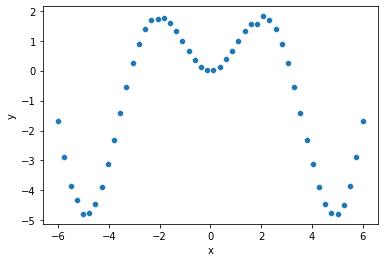

In [30]:
sns.scatterplot(data=data2, x='x', y='y');

In [25]:
data

,x,y
0,-6.000000,-1.676493
1,-5.755102,-2.899873
2,-5.510204,-3.847623
3,-5.265306,NaN
4,-5.020408,-4.784128
5,-4.775510,-4.766000
6,-4.530612,-4.455966
7,-4.285714,-3.901487
8,-4.040816,NaN
9,-3.795918,-2.310288
